In [1]:
print("to jest notebook do realizacji analizy rozkładów statystycznych")

to jest notebook do realizacji analizy rozkładów statystycznych


Analiza czasu reakcji kierowców i **dopasowanie** <span style="color:red;font-size:16pt;">rozkładu</span>!

In [11]:
#wygenrowanie danych
#większość ludzi reaguje 0.2 - 0.7s , ale czasem są spóżnienia

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
czasy_reakcji = np.concatenate([
    np.random.normal(0.25,0.7,90),#normalne reaklcje
    np.random.exponential(0.3,10)+0.93
])

czasy_reakcji= czasy_reakcji[czasy_reakcji>0]
czasy_reakcji

array([0.59769991, 0.15321499, 0.70338198, 1.3161209 , 0.08609264,
 0.08610413, 1.35544897, 0.78720431, 0.62979203, 0.41937359,
 0.46997313, 1.27595414, 0.09195659, 0.29726974, 0.32764581,
 0.51298861, 0.04581438, 1.54659473, 0.24055194, 0.82578144,
 0.39620452, 0.38780287, 0.76692661, 0.3699578 , 0.1690462 ,
 0.03922741, 0.98998556, 0.4905328 , 0.47685878, 0.6781734 ,
 0.97169967, 0.90189608, 0.03355134, 0.4818844 , 0.93288159,
 0.12003872, 0.81876808, 1.19936802, 0.19959291, 0.95247303,
 0.50314522, 0.50297692, 1.3266256 , 0.22492177, 1.34525056,
 0.82533175, 0.31093295, 0.04069485, 0.31423254, 0.09622968,
 0.4999788 , 1.28452583, 0.89078148, 0.48012578, 0.6092872 ,
 1.59924402, 1.16252997, 1.42420449, 1.60927279, 1.04481921,
 0.96497765, 1.00760602, 1.09711731, 1.44114892, 1.52140349])

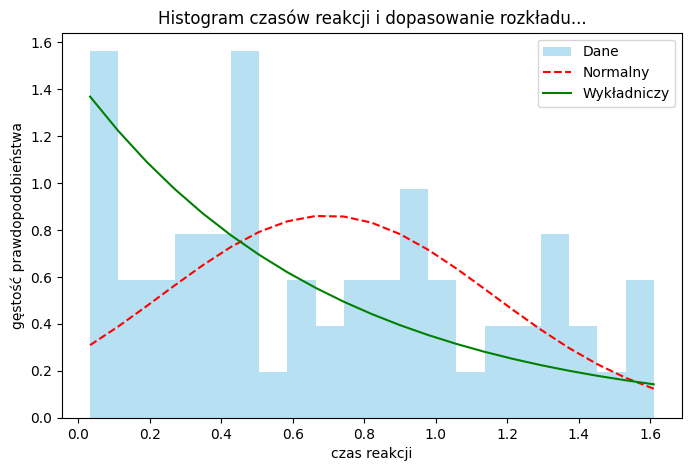

In [15]:
#wizualizacja danych
from scipy.stats import norm,expon

plt.figure(figsize=(8,5))
cont,bins,ignored = plt.hist(czasy_reakcji,bins=20,density=True,alpha=0.6,color="skyblue",label="Dane")

#dopasowanie rozkładu normalnego
mu, sigma = norm.fit(czasy_reakcji)
plt.plot(bins,norm.pdf(bins,mu,sigma),'r--',label="Normalny")

#dopasowanie rozkładu wykładniczego
loc, scale = expon.fit(czasy_reakcji,floc=0)
plt.plot(bins,expon.pdf(bins,loc,scale),'g-',label="Wykładniczy")

plt.xlabel("czas reakcji")
plt.ylabel("gęstość prawdopodobieństwa")
plt.title("Histogram czasów reakcji i dopasowanie rozkładu...")

plt.legend()
plt.savefig('histogram.png')
plt.savefig('histogram.pdf')
plt.show()

In [13]:
#test normalności Shapiro - Wilka
from scipy.stats import shapiro

stat, p = shapiro(czasy_reakcji)

print(f"Statystyka Shapiro-Wilka: {round(stat,4)}")
print(f"p-value:{round(p,4)}")

if p<0.05:
    print("Odrzucamy hipotezę o normalności rozkładu")
else:
    print("brak podstaw do odrzucenia normalności")

Statystyka Shapiro-Wilka: 0.9442
p-value:0.0055
Odrzucamy hipotezę o normalności rozkładu
